XOR 게이트 구현해보기<br> 0.0->0<br> 1,0->1<br> 0,1->1<br> 1,1->0 <br>
배타적 논리합 

둘 다 같은 값이면0, 하나라도 다르면 1

**데이터 준비하기**


In [ ]:
import numpy as np
import tensorflow as tf
tf.random.set_seed(777)

from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import mse


In [ ]:
#데이터 준비하기 
data =np.array([[0,0],[1,0],[0,1],[1,1]]) # xor 연산 학습 데이터
label = np.array([[0],[1],[1],[0]]) #정답 xor

In [ ]:
# #데이터 준비하기 학습 실패
# data =np.array([[0,0],[1,0],[0,1],[1,1]]) # or 연산 학습 데이터
# label = np.array([[0],[1],[1],[1]]) #정답

**모델 구성하기**

In [ ]:
#(일 개수 , 일 2개가 들어옴, 중간에 있는 활성 함수 relu를 사용 )

model = Sequential()
model.add(Dense(32,input_shape=(2,),activation='relu')) #다층 퍼셉트론을 구성 
model.add(Dense(1,activation ='sigmoid'))

#input_shape=(2,) 튜플 데이터 라고 설명 (2,) , 씀 [0,0] 두개의 값을 사용

**모델 설정하기**

In [ ]:
#model.compile(optimizer= SGD(), loss= mse, metrics=['acc']) #optimizer =>길잡이/가중치를 주는 역할 어느 변수를 줘서 가중치를 주는것 
model.compile(optimizer = RMSprop(), loss = mse, metrics = ['acc'])

In [ ]:
#모델 확인하기 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


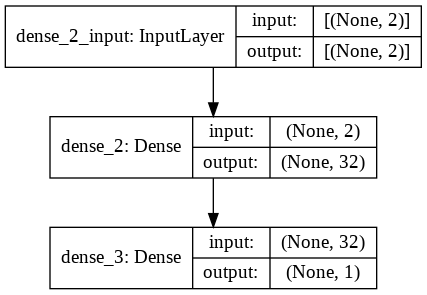

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)
#일 2개 물어왔으니까  32명일해 들어왔다 데이터 분석하고 보고서 하나 제출
#만약 최종 보고서가 엉망이면 옵티마이저가 가중치를 줘서 다시시킴
#손실값(loss) 낮으면 잘맞추고 있다.

**모델학습시키기**

In [ ]:
history  = model.fit(data,label,epochs=500) #학습데이터, 정답, 공부횟수

Epoch 1/500
1/1 [==============================] - 0s 342ms/step - loss: 0.2646 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2621 - acc: 0.2500
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2603 - acc: 0.2500
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2589 - acc: 0.2500
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2578 - acc: 0.2500
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2568 - acc: 0.2500
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2558 - acc: 0.2500
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2550 - acc: 0.2500
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2541 - acc: 0.2500
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2533 - acc: 0.2500
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 0.252

**학습결과 그려보기**

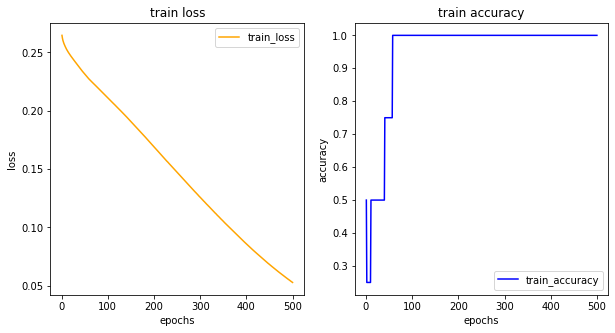

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()


**모델 가중치 확인** 어디에 더 비중을 더 했는지

In [ ]:
model.get_weights()

[array([[ 0.1621987 , -0.27036768,  0.41877338,  0.21862385, -0.21431386,
          0.37203708,  0.3910251 , -0.1588091 , -0.13779789, -0.23925437,
          0.12346169, -0.08019978,  0.24912181,  0.08274755,  0.10480657,
          0.30196306, -0.03311983, -0.37055987, -0.3493019 ,  0.34489372,
         -0.09392646, -0.1354908 , -0.12625915,  0.10447869, -0.10557416,
         -0.4093977 ,  0.25864324, -0.17278033, -0.15622199,  0.229754  ,
         -0.33862218, -0.00082418],
        [-0.32846928,  0.114342  ,  0.23189923, -0.20853847,  0.01370162,
          0.10974064, -0.23202762,  0.2845265 ,  0.13219717,  0.02713653,
         -0.03072101,  0.12167034, -0.10495982,  0.38395724,  0.3606718 ,
          0.2904329 , -0.01398495, -0.06497911,  0.09799007,  0.4014416 ,
          0.40118304,  0.29791835, -0.2543157 ,  0.32353982,  0.37311307,
         -0.17654489, -0.33378214, -0.3430747 ,  0.04326382,  0.26293692,
          0.10326269, -0.4087645 ]], dtype=float32),
 array([0., 0., 0., 0.,

**모델 예측하기**

In [ ]:
result = model.predict(data)
print(result)

[[0.5       ]
 [0.42182204]
 [0.4532429 ]
 [0.41836566]]


In [ ]:
result = model.predict_classes(data)
print(result)

[[0]
 [0]
 [0]
 [0]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
